# Estimating optimal stepsize for the first forward, backward and centered divided difference formula
## prepared by Maxim Khagay
### School of Science and Technology, Nazarbayev University

# Abstract
The report demonstrates three methods for numerical approximating of a derivative of a function using 15 stepsize values for each of them. Here theoretical estimations are used to compare with the results from the program we use, optimal step sizes for minimal range of errors are found for each of the method. 

# Introduction
Numerical differentiation is useful to calculate first derivative of a mathematical function by using values of function. 

### Theory
As it's written we use three main formulas: forward, backward and centered. All of them comes from Taylor series:
\begin{equation*}
f(x) = f(a) + f'(a)(x-a) + \frac{f''(a)(x-a)^2}{2!} + \frac{f'''(a)(x-a)^3}{3!} +...+\frac{f(a)^{n}(x-a)^n}{n!}
\end{equation*}

Firsly let introduce forward and backward formula:
\begin{equation*}
f'(x) = \frac{f(x_{i+1})-f(x_i)}{x_{i+1}-x_i} \hspace{0.3cm} and \hspace{0.3cm} f'(x) = \frac{f(x_{i})-f(x_{i-1})}{h},\hspace{0.3cm} respectively.
\end{equation*}
Centered formula comes from these two and become like mean:
\begin{equation*}
f'(x) = \frac{f(x_{i+1})-f(x_{x-1})}{2h}
\end{equation*}
Now let consider $error$. To calculate values of first derivative function we use computer calcultions on a programm, therefore there occured round off error, it comes from error on the last allowed digit. 
Next error is a truncation error. Truncation error occurs, where we skip some unnecesary calculations in each formula.  
\begin{equation*}
f'(x_i) = FDA + Error
\end{equation*}
To find errors for forward lets start from this:
\begin{equation*}
f'(x_i) = \frac{f(x_{i+1})-f(x_i)}{h}-O(h)
\end{equation*}
Now with considering round off and truncation error and notes from Chapra and Canale book take it like:
\begin{equation*}
f'(x_i) = FDA - O(h) + \frac{\epsilon_{i+1}-\epsilon_i}{h}
\end{equation*}
Now we can present error like:
\begin{equation*}
Error = |-O(h) + \frac{\epsilon_{i+1}-\epsilon_i}{h}| \leqslant max|O(h)|+max|\frac{\epsilon_{i+1}-\epsilon_i}{h}| = max|O(h)|+\frac{2\epsilon}{h}  \\
max|O(h)|=max|-\frac{f''(x)h}{2}|=max|-f''(x)|\frac{h}{2}
\end{equation*}
Now we can obtain such equation:
\begin{equation*}
Error \leqslant \frac{Mh}{2}+\frac{2\epsilon}{h}
\end{equation*}
Finishly we take derivative with and initialize it to 0 to find optimal $h$ for minimal range of error:
\begin{equation*}
\frac{M}{2}-\frac{2\epsilon}{h^2} => h = \sqrt{\frac{4\epsilon}{M}}
\end{equation*}
For backward we will go in such way and we obtain the same formula.
For centered we can take this formula for optimal $h$ from Chapra & Canale:
\begin{equation*}
h = (\frac{3\epsilon}{M})^{1/3}
\end{equation*}
However, $M$ for forward and backward will take second derivative of function, where $M$ for centered use third derivative.







# Formulation of the problem
We will use three types of differential approximation(forward, backward and centered) to find derivative of the function:
 \begin{equation*}
f(x) = -0.1x^4-0.15x^3-0.5x^2-0.25x+1.2 
\end{equation*}


At point $x = 5$ by using different stepsize values $h$ ranging in power of 10 from $10^0$ to $10^{-14}$. 
 

# Methods

For coding part let introduce these packages to use arrays and to make plots

In [ ]:
from numpy import *
from matplotlib.pyplot import *

Now let define function with its derivative

In [ ]:
def f(x):
    return -0.1*x**4-0.15*x**3-0.5*x**2-0.25*x+1.2
def df(x):
    return -0.4*x**3-0.45*x**2-x-0.25

In a next part we give value for $x$ and create arrays of $h$ and "error". After that we calculate first derivative for each step size by using forward formula. 

In [ ]:
x=5; n=15
h=zeros(n,float); error=zeros(n,float)

for i in range(n):
    h[i]=float(10**(-i))
    dfnum = (f(x+h[i])-f(x))/(h[i]); dftrue = df(x)
    error[i]=abs(dfnum-dftrue)

For the backward just change one command in a loop

In [ ]:
for i in range(n):
    h[i]=float(10**(-i))
    dfnum = (f(x)-f(x-h[i]))/(h[i]); dftrue = df(x)
    error[i]=abs(dfnum-dftrue)

The same operating for centered

In [ ]:
for i in range(n):
    h[i]=float(10**(-i))
    dfnum = (f(x+h[i])-f(x-h[i]))/(2*h[i]); dftrue = df(x)
    error[i]=abs(dfnum-dftrue)

Finally we can make a plot for each of three formulas, we use loglog to exactly show in order of ten.

In [ ]:
loglog(h,error)
xlabel('Stepsize'); ylabel('Absolute Error'); 
show() 

Let's merge all parts and we have 3 graphs Absolte Error vs Stepsize. 

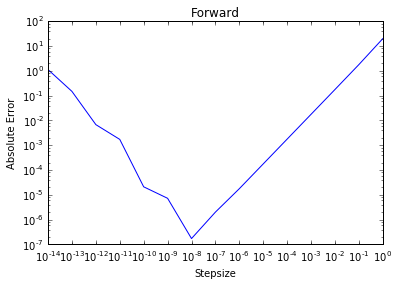

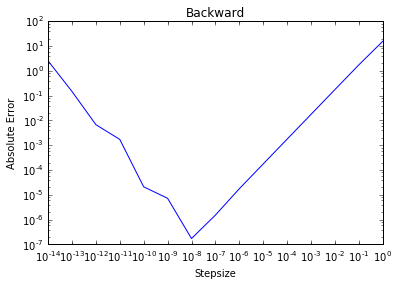

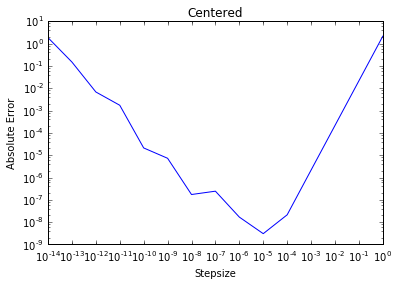

In [11]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *

def f(x):
    return -0.1*x**4-0.15*x**3-0.5*x**2-0.25*x+1.2

def df(x):
    return -0.4*x**3-0.45*x**2-x-0.25

x=5; n=15
h=zeros(n,float); error=zeros(n,float)

for i in range(n):
    h[i]=float(10**(-i))
    dfnum = (f(x+h[i])-f(x))/(h[i]); dftrue = df(x)
    error[i]=abs(dfnum-dftrue)
    
title('Forward')
loglog(h,error)
xlabel('Stepsize'); ylabel('Absolute Error'); 
show() 

for i in range(n):
    h[i]=float(10**(-i))
    dfnum = (f(x)-f(x-h[i]))/(h[i]); dftrue = df(x)
    error[i]=abs(dfnum-dftrue)

title('Backward')    
loglog(h,error)
xlabel('Stepsize'); ylabel('Absolute Error'); 
show() 

for i in range(n):
    h[i]=float(10**(-i))
    dfnum = (f(x+h[i])-f(x-h[i]))/(2*h[i]); dftrue = df(x)
    error[i]=abs(dfnum-dftrue)
    
title('Centered')    
loglog(h,error)
xlabel('Stepsize'); ylabel('Absolute Error'); 
show() 

## Discussion and Conclusion
From graphs we can see that $h$ optimal stepsize for forward and backward equals to $10^{-8}$, $h$ optimal stepsize for centered equals to $10^{-5}$.

Now let calculate theoretical values by using formulas from theory part.
For Forward and Backward:
\begin{equation*}
h = \sqrt{\frac{4\epsilon}{M}}\\
M = |-1.2*5^2-0.9*5-5|\\
M = 39.5\\
\epsilon = 0.5*10^{-16}\\
h = 2.2*10^{-9}
\end{equation*}
For Centered:
\begin{equation*}
h = \frac{3\epsilon}{M}^{\frac{1}{3}}\\
M = |-2.4*5-0.9|\\
M = 12.9\\
\epsilon = 0.5*10^{-16}\\
h = 2.3*10^{-6}
\end{equation*}

The values of optimal stepsizes are not the same because the error of $f(x)$ is larger than $10^{-16}$, because it propagates by means of ($x$ also has that round-off error):

\begin{equation*}
\delta f=|f'(x)|\delta x \approx 10^{-15}
\end{equation*}

To get right results we should substite this value instead of the old one that we used.